<a href="https://colab.research.google.com/github/daniel-freitas48/CEP_Prova1/blob/main/DanielCruzDeFreitas_CEP_Prova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROVA DE CONTROLE ESTATÍSTICO DE PROCESSOS (CEP)
## Universidade de Brasília — Engenharia de Produção
### Professor: Dr. André Luiz Marques Serrano
### Autor: Daniel Cruz de Freitas
### Tema: Cartas de Controle X-barra e R

# Passo 1: Importação de Bibliotecas

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Passo 2: Carregamento de Dados

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
caminho_drive = '/content/drive/MyDrive/DanielCruzDeFreitas_CEP_Prova.csv'
df=pd.read_csv(caminho_drive)

#Verificar se os dados foram carregados corretamente

print(f"Dimensões: {df.shape[0]} amostras x {df.shape[1]} colunas\n")

Dimensões: 25 amostras x 6 colunas



In [32]:
#Verificando a presença de nulos

print("\n Informações do DataFrame:")
df.info()
print("\nValores ausentes por coluna:")
print(df.isnull().sum())


 Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Amostra   25 non-null     int64  
 1   Medida_1  25 non-null     float64
 2   Medida_2  25 non-null     float64
 3   Medida_3  25 non-null     float64
 4   Medida_4  25 non-null     float64
 5   Medida_5  25 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.3 KB

Valores ausentes por coluna:
Amostra     0
Medida_1    0
Medida_2    0
Medida_3    0
Medida_4    0
Medida_5    0
dtype: int64


In [33]:
#Verificar se a base está formatada corretamente, mostrando as 5 primeiras linhas

print("🔍 Exibindo as 5 primeiras linhas do arquivo carregado:\n")
display(df.head(5))

🔍 Exibindo as 5 primeiras linhas do arquivo carregado:



,Amostra,Medida_1,Medida_2,Medida_3,Medida_4,Medida_5
0,1,74.030,74.002,74.019,73.992,74.008
1,2,73.995,73.992,74.001,74.011,74.004
2,3,73.988,74.024,74.021,74.005,74.002
3,4,74.006,74.007,74.013,73.988,74.028
4,5,73.992,74.007,74.015,73.984,74.014


# Passo 3: Cálculo das Estatísticas por Amostra

In [34]:
#Identificar  as colunas de medições

colunas_medidas = [col for col in df.columns if "Medida" in col]

# Calcular a média (X̄) e a amplitude (R) para cada amostra

df["Xbar"] = df[colunas_medidas].mean(axis=1)
df["R"] = df[colunas_medidas].max(axis=1) - df[colunas_medidas].min(axis=1)

# Exibir as primeiras linhas com as novas colunas

print("As colunas 'Xbar' (média) e 'R' (amplitude) foram adicionadas ao DataFrame.\n")

display(df[["Amostra", "Xbar", "R"]].round(4).head(10))


As colunas 'Xbar' (média) e 'R' (amplitude) foram adicionadas ao DataFrame.



,Amostra,Xbar,R
0,1,74.0102,0.038
1,2,74.0006,0.019
2,3,74.0080,0.036
3,4,74.0084,0.040
4,5,74.0024,0.031
5,6,73.9872,0.062
6,7,74.0006,0.011
7,8,73.9994,0.028
8,9,73.9994,0.012
9,10,73.9984,0.008


# Passo 4: Cálculo dos Limites de Controle para Carta X-Barra

In [35]:
#1. Cálculo das médias globais

X_duplo_barra = df["Xbar"].mean()
R_barra = df["R"].mean()

#2. Constante A2 para n=5

A2 = 0.577

#3. Cálculo dos limites de controle

LSC_Xbar = X_duplo_barra + A2 * R_barra
LIC_Xbar = X_duplo_barra - A2 * R_barra
LC_Xbar = X_duplo_barra

#4. Exibição dos resultados

print("Limites de Controle – Carta X̄ (n = 5)")
print(f"Média das médias (X̄̄): {X_duplo_barra:.5f}")
print(f"Média das amplitudes (R̄): {R_barra:.5f}")
print(f"LSC (Limite Superior de Controle): {LSC_Xbar:.5f}")
print(f"LC  (Linha Central): {LC_Xbar:.5f}")
print(f"LIC (Limite Inferior de Controle): {LIC_Xbar:.5f}")


Limites de Controle – Carta X̄ (n = 5)
Média das médias (X̄̄): 74.00229
Média das amplitudes (R̄): 0.02944
LSC (Limite Superior de Controle): 74.01927
LC  (Linha Central): 74.00229
LIC (Limite Inferior de Controle): 73.98530


# Passo 5: Cálculo dos Limites de Controle para Carta R

In [36]:
#Fórmulas (n = 5):
#LSC_R = D4 * R̄
#LIC_R = D3 * R̄   (para n=5, D3 = 0 → LIC_R = 0)
#LC_R  = R̄
#Constantes: D3 = 0.000, D4 = 2.114

D3, D4 = 0.000, 2.114

LSC_R = D4 * R_barra
LIC_R = D3 * R_barra
LC_R  = R_barra

print("Limites de Controle – Carta R (n = 5)")
print(f"R̄ (média das amplitudes): {R_barra:.5f}")
print(f"LSC (Limite Superior de Controle): {LSC_R:.5f}")
print(f"LC  (Linha Central): {LC_R:.5f}")
print(f"LIC (Limite Inferior de Controle): {LIC_R:.5f}")

Limites de Controle – Carta R (n = 5)
R̄ (média das amplitudes): 0.02944
LSC (Limite Superior de Controle): 0.06224
LC  (Linha Central): 0.02944
LIC (Limite Inferior de Controle): 0.00000


## Tabelas Auxiliares para o Relatório

In [37]:
X_duplo_barra = df["Xbar"].mean()
R_barra = df["R"].mean()
A2 = 0.577
D3, D4 = 0.000, 2.114

#Limites X̄
LSC_Xbar = X_duplo_barra + A2 * R_barra
LIC_Xbar = X_duplo_barra - A2 * R_barra
LC_Xbar  = X_duplo_barra

#Limites R
LSC_R = D4 * R_barra
LIC_R = D3 * R_barra
LC_R  = R_barra

#Tabela-resumo
tabela_resumo = pd.DataFrame({
    "Parâmetro": ["X̄̄", "R̄", "X̄ - LIC", "X̄ - LC", "X̄ - LSC", "R - LIC", "R - LC", "R - LSC"],
    "Valor": [
        X_duplo_barra, R_barra,
        LIC_Xbar, LC_Xbar, LSC_Xbar,
        LIC_R, LC_R, LSC_R
    ]
}).round(5)

display(tabela_resumo)

#Salvar CSV da tabela
tabela_resumo.to_csv("tabela_resumo_limites.csv", index=False)

#Lista de pontos fora de controle
ooc_x = df[(df["Xbar"] > LSC_Xbar) | (df["Xbar"] < LIC_Xbar)][["Amostra", "Xbar"]].round(5)
ooc_r = df[(df["R"] > LSC_R)   | (df["R"] < LIC_R)][["Amostra", "R"]].round(5)

print("\nPontos fora de controle — Carta X̄:")
display(ooc_x if not ooc_x.empty else pd.DataFrame(columns=["Amostra", "Xbar"]))

print("\nPontos fora de controle — Carta R:")
display(ooc_r if not ooc_r.empty else pd.DataFrame(columns=["Amostra", "R"]))


,Parâmetro,Valor
0,X̄̄,74.00229
1,R̄,0.02944
2,X̄ - LIC,73.98530
3,X̄ - LC,74.00229
4,X̄ - LSC,74.01927
5,R - LIC,0.00000
6,R - LC,0.02944
7,R - LSC,0.06224



Pontos fora de controle — Carta X̄:


,Amostra,Xbar



Pontos fora de controle — Carta R:


,Amostra,R
15,16,0.111


# Passo 6: Construção da Carta X-Barra




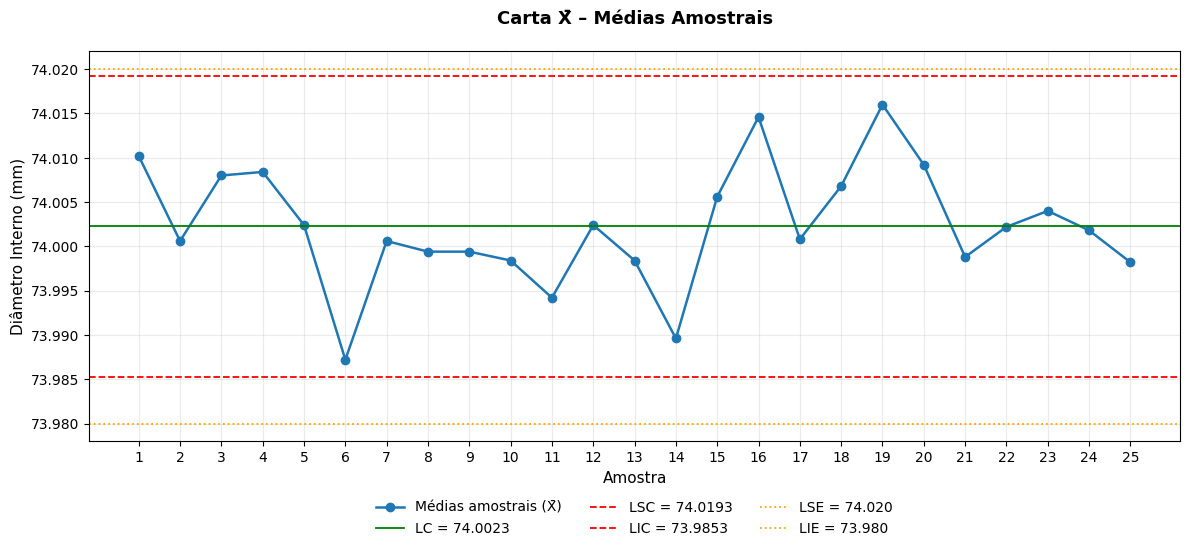

In [38]:
#Ajustando o tamanho do gráfico
plt.figure(figsize=(12, 6))

#Série principal
plt.plot(df["Amostra"], df["Xbar"], marker="o", linewidth=1.8, color="#1f77b4", label="Médias amostrais (X̄)")

#Linhas de controle
plt.axhline(LC_Xbar, color="green", linestyle="-", linewidth=1.3, label=f"LC = {LC_Xbar:.4f}")
plt.axhline(LSC_Xbar, color="red", linestyle="--", linewidth=1.3, label=f"LSC = {LSC_Xbar:.4f}")
plt.axhline(LIC_Xbar, color="red", linestyle="--", linewidth=1.3, label=f"LIC = {LIC_Xbar:.4f}")

#Limites de especificação
plt.axhline(74.020, color="orange", linestyle=":", linewidth=1.3, label="LSE = 74.020")
plt.axhline(73.980, color="orange", linestyle=":", linewidth=1.3, label="LIE = 73.980")

#Identificar pontos fora de controle
ooc_x = df[(df["Xbar"] > LSC_Xbar) | (df["Xbar"] < LIC_Xbar)]
if not ooc_x.empty:
    plt.scatter(ooc_x["Amostra"], ooc_x["Xbar"], s=90, facecolors="none", edgecolors="red", label="Fora de controle")

#Configuração do gráfico
plt.title("Carta X̄ – Médias Amostrais", fontsize=13, fontweight="bold", pad=20)
plt.xlabel("Amostra", fontsize=11)
plt.ylabel("Diâmetro Interno (mm)", fontsize=11)
plt.xticks(df["Amostra"])
plt.grid(alpha=0.25)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12), ncol=3, frameon=False)
plt.tight_layout(rect=[0, 0.05, 1, 1])

#Exportar imagem
plt.savefig("carta_Xbar_ajustada.png", dpi=300, bbox_inches="tight")
plt.show()

# Passo 7: Construção da Carta R

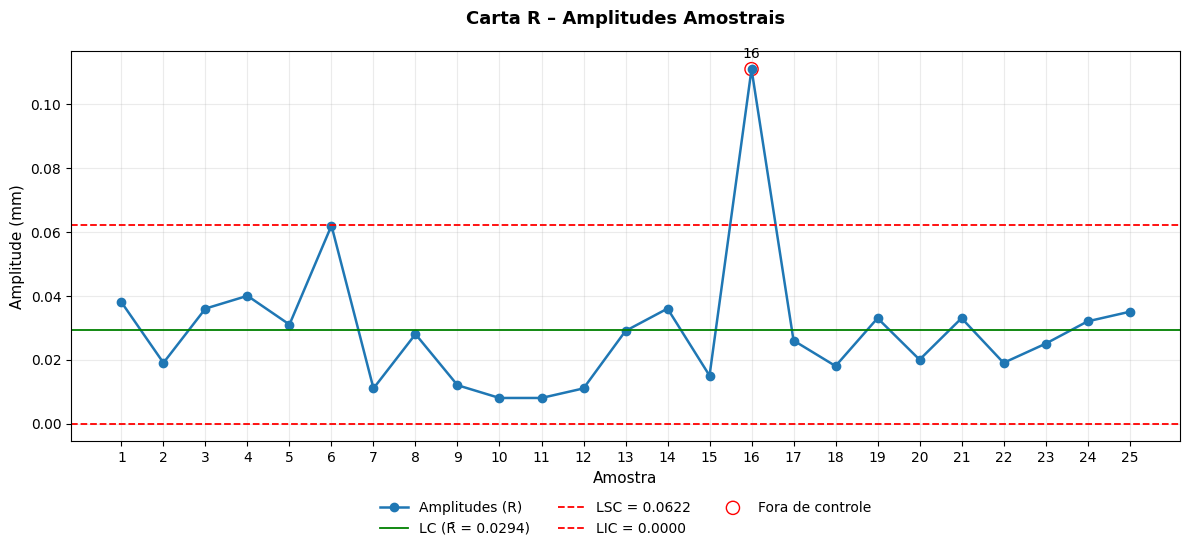

,Amostra,R
15,16,0.111


In [39]:
#1)Parâmetros da Carta R para a célula ser auto-contida
R_barra = df["R"].mean()
D3, D4 = 0.000, 2.114
LSC_R = D4 * R_barra
LIC_R = D3 * R_barra
LC_R  = R_barra

#2) Identificar pontos fora de controle
ooc_r = df[(df["R"] > LSC_R) | (df["R"] < LIC_R)]

#3)Ajustando o tamanho do gráfico
plt.figure(figsize=(12, 6))

#Série principal
plt.plot(df["Amostra"], df["R"], marker="o", linewidth=1.8, color="#1f77b4", label="Amplitudes (R)")

#Linhas de controle
plt.axhline(LC_R,  color="green", linestyle="-",  linewidth=1.3, label=f"LC (R̄ = {LC_R:.4f})")
plt.axhline(LSC_R, color="red",   linestyle="--", linewidth=1.3, label=f"LSC = {LSC_R:.4f}")
plt.axhline(LIC_R, color="red",   linestyle="--", linewidth=1.3, label=f"LIC = {LIC_R:.4f}")

#Destaque de pontos fora de controle
if not ooc_r.empty:
    plt.scatter(ooc_r["Amostra"], ooc_r["R"], s=90, facecolors="none", edgecolors="red", label="Fora de controle")
    for _, r in ooc_r.iterrows():
        plt.annotate(int(r["Amostra"]), (r["Amostra"], r["R"]), xytext=(0, 8), textcoords="offset points", ha="center")

#Configuração visual
plt.title("Carta R – Amplitudes Amostrais", fontsize=13, fontweight="bold", pad=20)
plt.xlabel("Amostra", fontsize=11)
plt.ylabel("Amplitude (mm)", fontsize=11)
plt.xticks(df["Amostra"])
plt.grid(alpha=0.25)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12), ncol=3, frameon=False)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("carta_R_ajustada.png", dpi=300, bbox_inches="tight")
plt.show()

#4) Tabela com pontos fora de controle
if ooc_r.empty:
    print("Nenhum ponto fora de controle na Carta R.")
else:
    display(ooc_r[["Amostra", "R"]].round(5))

# Passo 8: Análise de Pontos Fora de Controle

Durante a análise das cartas de controle, verificou-se o comportamento de estabilidade das médias e amplitudes amostrais, permitindo identificar possíveis pontos fora dos limites de controle.


---


**Carta X̄ – Médias Amostrais**

Na Carta X̄, não foram identificados pontos fora dos limites de controle (LSC = 74,0193 e LIC = 73,9853).
Todas as médias amostrais permanecem dentro dos limites calculados, sem tendência ascendente, descendente ou padrões sistemáticos.
Esse resultado indica que não há causas especiais de variação atuando sobre a média do processo, o que demonstra estabilidade e controle estatístico adequado nesse aspecto.


---


**Carta R – Amplitudes Amostrais**

Na Carta R, observou-se um ponto fora dos limites de controle, correspondente à amostra 16, cuja amplitude ultrapassou o LSC = 0,0622.
Essa ocorrência sugere a presença de uma causa especial de variação, que pode ter origem em:

*   Alteração nas condições de corte (velocidade, avanço, temperatura);
*   Erro pontual de medição ou leitura do instrumento;
*   Variação anormal na matéria-prima.
*   Desgaste ou falha momentânea da ferramenta de usinagem;


Esse ponto deve ser investigado, pois reflete instabilidade momentânea no controle da dispersão do processo, ainda que isolada.


# Passo 9: Interpretação dos Resultados

A análise conjunta das Cartas de Controle X̄ e R permite avaliar o comportamento global do processo de usinagem dos anéis de pistão e verificar se ele se encontra sob controle estatístico.

## Comportamento da Carta X̄ (Médias Amostrais)

A Carta X̄ demonstra que todas as médias amostrais permanecem dentro dos limites de controle calculados (LIC = 73,9853 e LSC = 74,0193), sem ocorrência de pontos fora dos limites ou indícios de tendência sistemática.


Esse comportamento confirma que o processo apresenta apenas causas comuns de variação, o que caracteriza estabilidade e controle estatístico em relação à média.

Além disso, os limites de controle estão contidos dentro dos limites de especificação do produto (LIE = 73,980 e LSE = 74,020), indicando que o processo é capaz e centrado, mantendo o diâmetro médio das peças dentro da tolerância especificada.

## Comportamento da Carta R (Amplitudes Amostrais)


A Carta R revelou uma única amostra fora dos limites de controle — a amostra 16 — cuja amplitude ultrapassou o LSC = 0,0622.

Esse ponto caracteriza uma causa especial de variação, sugerindo que em determinado momento ocorreu uma flutuação anormal da variabilidade, possivelmente associada a fatores como:


*   Variação na regulagem do equipamento;
*   Desgaste da ferramenta de corte;
*  Alterações momentâneas no material ou condições de operação;
*  Erro pontual na medição.

Como as demais amostras permaneceram dentro dos limites, essa ocorrência deve ser tratada como pontual e não sistêmica, mas ainda assim requer investigação e correção preventiva para evitar reincidência.

## Conclusão Geral

De modo geral, o processo analisado apresenta estabilidade estatística em relação à média e baixa variabilidade, sendo considerado sob controle segundo os princípios do Controle Estatístico de Processos (CEP).

A ocorrência isolada de uma causa especial na Carta R não compromete o desempenho global do processo, mas indica a necessidade de acompanhamento periódico e manutenção preventiva dos equipamentos de usinagem.

Portanto, conclui-se que o processo de fabricação dos anéis de pistão encontra-se sob controle estatístico e apto a atender às especificações dimensionais, apresentando consistência e qualidade no produto final.